In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset

In [2]:
## load data set
data = pd.read_csv('penguins.csv')
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

## Understand the given data 

In [3]:
data.shape

(344, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
data.describe() ##statistical data

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [6]:
data.describe().transpose()

count         mean         std     min       25%      50%  \
rowid              344.0   172.500000   99.448479     1.0    86.750   172.50   
bill_length_mm     342.0    43.921930    5.459584    32.1    39.225    44.45   
bill_depth_mm      342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   
year               344.0  2008.029070    0.818356  2007.0  2007.000  2008.00   

                       75%     max  
rowid               258.25   344.0  
bill_length_mm       48.50    59.6  
bill_depth_mm        18.70    21.5  
flipper_length_mm   213.00   231.0  
body_mass_g        4750.00  6300.0  
year               2009.00  2009.0

In [7]:
data.describe(include=['O'])

species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       152     168   168

In [8]:
data.describe(include='all')

rowid species  island  bill_length_mm  bill_depth_mm  \
count   344.000000     344     344      342.000000     342.000000   
unique         NaN       3       3             NaN            NaN   
top            NaN  Adelie  Biscoe             NaN            NaN   
freq           NaN     152     168             NaN            NaN   
mean    172.500000     NaN     NaN       43.921930      17.151170   
std      99.448479     NaN     NaN        5.459584       1.974793   
min       1.000000     NaN     NaN       32.100000      13.100000   
25%      86.750000     NaN     NaN       39.225000      15.600000   
50%     172.500000     NaN     NaN       44.450000      17.300000   
75%     258.250000     NaN     NaN       48.500000      18.700000   
max     344.000000     NaN     NaN       59.600000      21.500000   

        flipper_length_mm  body_mass_g   sex         year  
count          342.000000   342.000000   333   344.000000  
unique                NaN          NaN     2          NaN  
top                   NaN          NaN  male          NaN  
freq                  NaN          NaN   168          NaN  
mean           200.915205  4201.754386   NaN  2008.029070  
std             14.061714   801.954536   NaN     0.818356  
min            172.000000  2700.000000   NaN  2007.000000  
25%            190.000000  3550.000000   NaN  2007.000000  
50%            197.000000  4050.000000   NaN  2008.000000  
75%            213.000000  4750.000000   NaN  2009.000000  
max            231.000000  6300.000000   NaN  2009.000000

In [9]:
data.nunique()  ##unique values

rowid                344
species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64

## Find null values

In [10]:
data.isnull()

rowid  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    False    False   False           False          False              False   
1    False    False   False           False          False              False   
2    False    False   False           False          False              False   
3    False    False   False            True           True               True   
4    False    False   False           False          False              False   
..     ...      ...     ...             ...            ...                ...   
339  False    False   False           False          False              False   
340  False    False   False           False          False              False   
341  False    False   False           False          False              False   
342  False    False   False           False          False              False   
343  False    False   False           False          False              False   

     body_mass_g    sex   year  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3           True   True  False  
4          False  False  False  
..           ...    ...    ...  
339        False  False  False  
340        False  False  False  
341        False  False  False  
342        False  False  False  
343        False  False  False  

[344 rows x 9 columns]

In [11]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [12]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
data.iloc[:,:] = imputer.fit_transform(data)

In [13]:
data.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [14]:
data.drop(columns=['rowid'], inplace=True)

In [15]:
data

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen            41.1           17.0              190.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3         3800.0    male  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

In [82]:
##correlation
data.corr()

ValueError: could not convert string to float: 'Adelie'

In [84]:
## heat map
sns.heatmap(data.corr(), cmap= 'Wistia', annot=True)

ValueError: could not convert string to float: 'Adelie'

Correlation Matrix:
                    bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.234635           0.656856   
bill_depth_mm           -0.234635       1.000000          -0.582472   
flipper_length_mm        0.656856      -0.582472           1.000000   
body_mass_g              0.595720      -0.471339           0.871302   
year                     0.054371      -0.060073           0.168799   
species_Chinstrap        0.449678       0.320685          -0.177957   
species_Gentoo           0.489611      -0.821666           0.862698   
island_Dream             0.036188       0.455932          -0.416423   
island_Torgersen        -0.381137       0.268633          -0.291225   
sex_male                 0.319192       0.353939           0.238785   

                   body_mass_g      year  species_Chinstrap  species_Gentoo  \
bill_length_mm        0.595720  0.054371           0.449678        0.489611   
bill_depth_mm        -0.471339 -0.06007

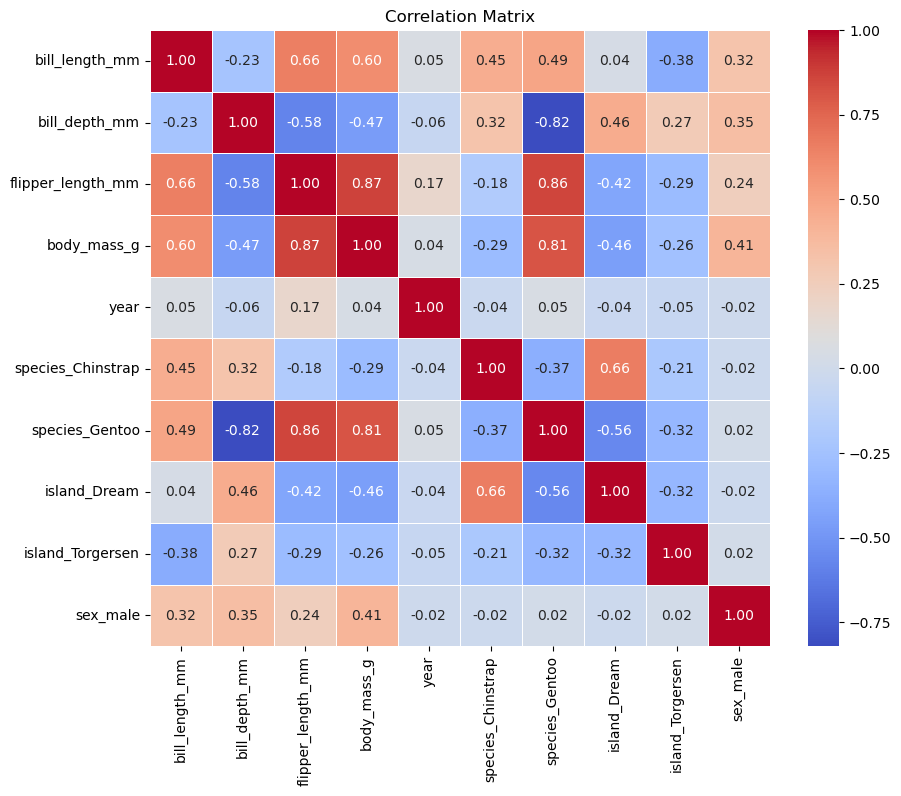

In [16]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Correlation matrix
correlation_matrix = data_encoded.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
data_encoded

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0              39.1           18.7              181.0       3750.0  2007   
1              39.5           17.4              186.0       3800.0  2007   
2              40.3           18.0              195.0       3250.0  2007   
3              41.1           17.0              190.0       3800.0  2007   
4              36.7           19.3              193.0       3450.0  2007   
..              ...            ...                ...          ...   ...   
339            55.8           19.8              207.0       4000.0  2009   
340            43.5           18.1              202.0       3400.0  2009   
341            49.6           18.2              193.0       3775.0  2009   
342            50.8           19.0              210.0       4100.0  2009   
343            50.2           18.7              198.0       3775.0  2009   

     species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  \
0                False           False         False              True   
1                False           False         False              True   
2                False           False         False              True   
3                False           False         False              True   
4                False           False         False              True   
..                 ...             ...           ...               ...   
339               True           False          True             False   
340               True           False          True             False   
341               True           False          True             False   
342               True           False          True             False   
343               True           False          True             False   

     sex_male  
0        True  
1       False  
2       False  
3        True  
4       False  
..        ...  
339      True  
340     False  
341      True  
342      True  
343     False  

[344 rows x 10 columns]

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

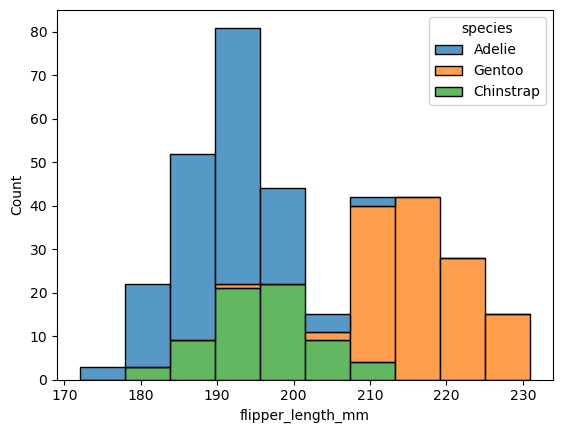

In [19]:
sns.histplot(data, x="flipper_length_mm", hue="species", multiple="stack")

In [20]:
## visualizations

In [21]:
sns.__version__

'0.12.2'

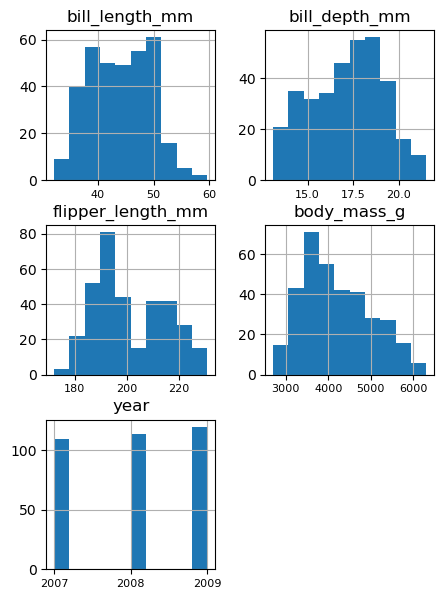

In [22]:
data_numeric = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year']]
# all distributed
data_numeric.hist(figsize=(5,7), xlabelsize = 8);

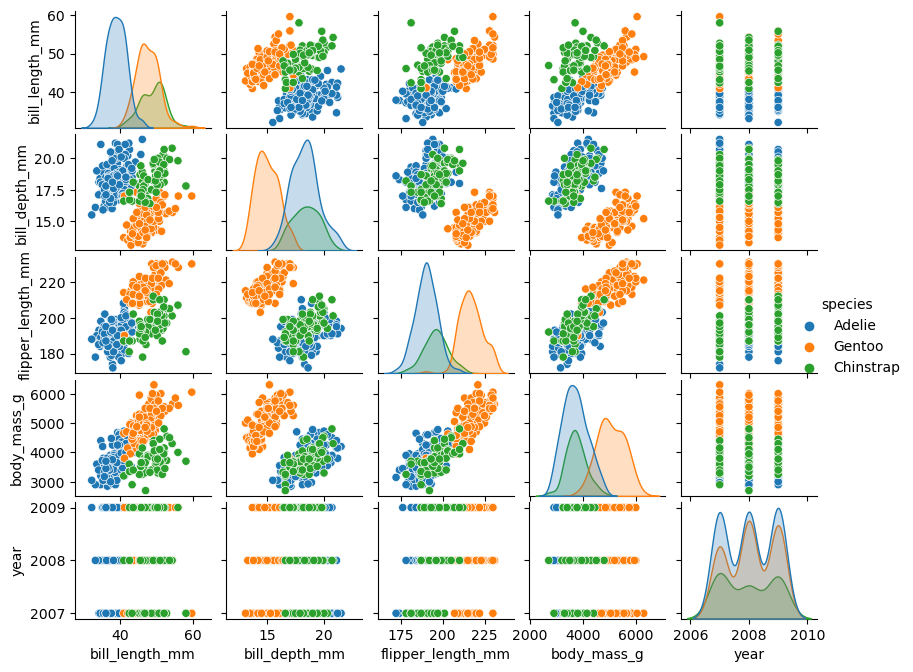

In [23]:
import seaborn as sns

pairplot_figure = sns.pairplot(data, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)

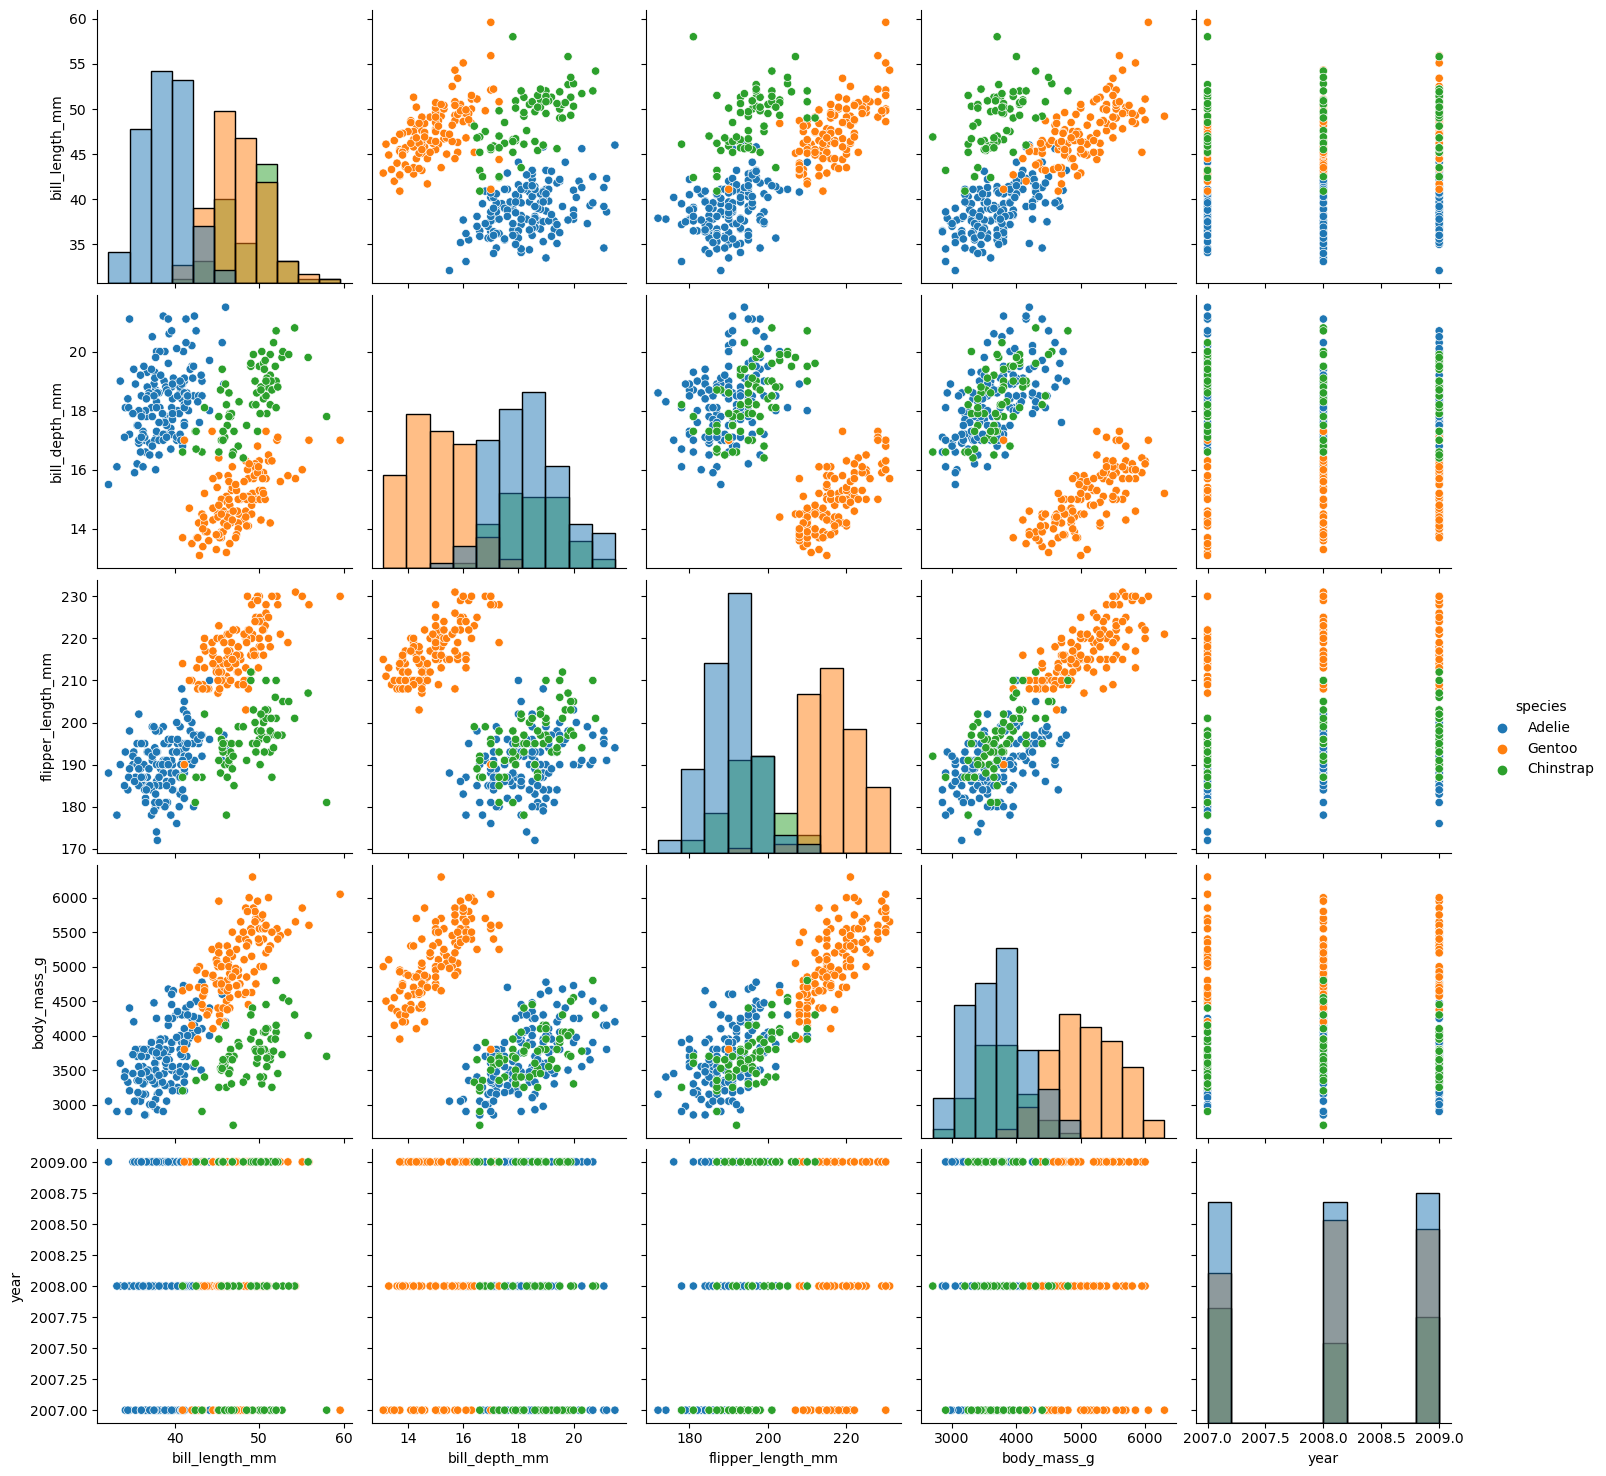

In [24]:
sns.pairplot(data, hue="species", size=3,diag_kind="hist")

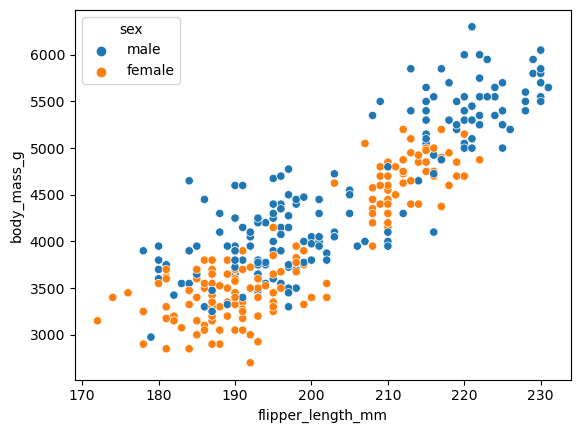

In [25]:
feature_name = "flipper_length_mm"
target_column = "body_mass_g"
scatter = sns.scatterplot(data, x=feature_name, y=target_column, hue='sex')

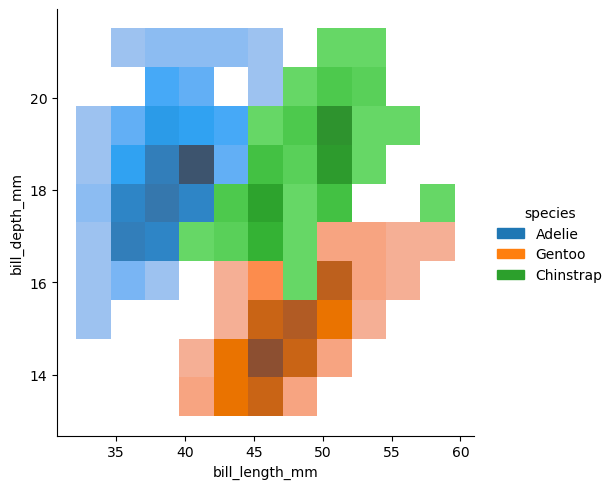

In [26]:
sns.displot(data, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [27]:
## Species Based Gender 
import plotly.express as px
px.bar( data_frame=data, y = 'island', 
        facet_row='species',facet_row_spacing=0.10, 
        pattern_shape='species',
        color='species', 
        color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
        width=600,height=400 )

In [28]:
fig =px.bar( data_frame=data, y = 'sex',

facet_row='species',facet_row_spacing=0.10,

pattern_shape='species',

color='species',

color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},

width=700,height=500 )

fig.show()

In [29]:
## plot based on gender
fig = px.scatter(data_frame=data, x='flipper_length_mm' , y = 'body_mass_g', 
                 facet_col='species', color='sex',
                 color_discrete_map={'Male':'darkblue','Female':'deeppink'}
                 )
fig.update_layout(showlegend = False,height=400,title='Species based Gender scatter plot', 
                   titlefont = dict(size =36, color='black', family='Open Sans',), 
                   font=dict(size=14,color='black'))
fig.show()

In [ ]:
## add more visualisations and

## find relation
## get insights

In [30]:
# Step 1: Separate the target variable from predictor variables
X = data.drop(columns=['species'])  # Predictor variables (features)
y = data['species']  # Target variable

# Step 2: Handle categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Step 3: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (275, 10)
Shape of X_test: (69, 10)
Shape of y_train: (275,)
Shape of y_test: (69,)


In [33]:
# Group the data by 'island' and 'sex' and count the occurrences
counts = data.groupby(['island', 'sex']).size().unstack()

# Print the counts
print("Counts of female and male penguins separated by island:")
print(counts)

Counts of female and male penguins separated by island:
sex        female  male
island                 
Biscoe         80    88
Dream          61    63
Torgersen      24    28


In [34]:
# Group the data by 'sex' and other relevant columns and count the occurrences
gender_counts = data.groupby(['sex', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']).size()

# Print the counts for female and male penguins separately
female_counts = gender_counts.loc['female']
male_counts = gender_counts.loc['male']

print("Female penguins counts:")
print(female_counts)

print("\nMale penguins counts:")
print(male_counts)

Female penguins counts:
island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
Biscoe     34.5            18.1           187.0              2900.0         1
           35.0            17.9           190.0              3450.0         1
                                          192.0              3725.0         1
           35.3            18.9           187.0              3800.0         1
           35.5            16.2           195.0              3350.0         1
                                                                           ..
Torgersen  39.6            17.2           196.0              3550.0         1
           40.2            17.0           176.0              3450.0         1
           40.3            18.0           195.0              3250.0         1
           40.9            16.8           191.0              3700.0         1
           41.1            17.6           182.0              3200.0         1
Length: 165, dtype: int64

Male penguins coun

In [35]:
# Group the data by 'sex' and other relevant columns and count the occurrences
gender_counts = data.groupby(['sex', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']).size().reset_index(name='count')

# Create pivot tables for female and male penguins separately
female_pivot = gender_counts[gender_counts['sex'] == 'female']
male_pivot = gender_counts[gender_counts['sex'] == 'male']

# Display the pivot tables
print("Female Penguins:")
print(female_pivot)

print("\nMale Penguins:")
print(male_pivot)

Female Penguins:
        sex     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    female     Biscoe            34.5           18.1              187.0   
1    female     Biscoe            35.0           17.9              190.0   
2    female     Biscoe            35.0           17.9              192.0   
3    female     Biscoe            35.3           18.9              187.0   
4    female     Biscoe            35.5           16.2              195.0   
..      ...        ...             ...            ...                ...   
160  female  Torgersen            39.6           17.2              196.0   
161  female  Torgersen            40.2           17.0              176.0   
162  female  Torgersen            40.3           18.0              195.0   
163  female  Torgersen            40.9           16.8              191.0   
164  female  Torgersen            41.1           17.6              182.0   

     body_mass_g  count  
0         2900.0      1  
1         3450.0  

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Separate the target variable from the predictor variables
X = data.drop(columns=['species'])
y = data['species']

# Handle categorical variables (one-hot encoding)
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        32
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [38]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        32
   Chinstrap       0.87      1.00      0.93        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69

